## Sattellite Image classification

#### Import necessary libraries

In [24]:
import numpy as np  
import matplotlib.pyplot as plt 
import seaborn as sns

#### Fetch the training Data

In [27]:
pwd

'C:\\Users\\DHILSHANA SHIRIN\\Edure\\Deep learning\\Deep learning course notes\\Deep learning course notes\\9. Capstone project\\Sattellite Image classification\\data'

In [29]:
import glob

In [31]:
cloudy = glob.glob('cloudy/*.jpg')
desert = glob.glob('desert/*.jpg')
green_area = glob.glob('green_area/*.jpg')
water = glob.glob('water/*.jpg')

In [33]:
water

['water\\SeaLake_1125.jpg',
 'water\\SeaLake_1126.jpg',
 'water\\SeaLake_1127.jpg',
 'water\\SeaLake_1128.jpg',
 'water\\SeaLake_1131.jpg',
 'water\\SeaLake_1132.jpg',
 'water\\SeaLake_1133.jpg',
 'water\\SeaLake_1134.jpg',
 'water\\SeaLake_1135.jpg',
 'water\\SeaLake_1138.jpg',
 'water\\SeaLake_1140.jpg',
 'water\\SeaLake_1141.jpg',
 'water\\SeaLake_1144.jpg',
 'water\\SeaLake_1145.jpg',
 'water\\SeaLake_1146.jpg',
 'water\\SeaLake_1147.jpg',
 'water\\SeaLake_1148.jpg',
 'water\\SeaLake_1151.jpg',
 'water\\SeaLake_1154.jpg',
 'water\\SeaLake_1156.jpg',
 'water\\SeaLake_1157.jpg',
 'water\\SeaLake_1158.jpg',
 'water\\SeaLake_1159.jpg',
 'water\\SeaLake_1160.jpg',
 'water\\SeaLake_1163.jpg',
 'water\\SeaLake_1164.jpg',
 'water\\SeaLake_1165.jpg',
 'water\\SeaLake_1169.jpg',
 'water\\SeaLake_1172.jpg',
 'water\\SeaLake_1175.jpg',
 'water\\SeaLake_1176.jpg',
 'water\\SeaLake_1178.jpg',
 'water\\SeaLake_1180.jpg',
 'water\\SeaLake_1184.jpg',
 'water\\SeaLake_1185.jpg',
 'water\\SeaLake_118

#### Find the number of images of all classes 

In [35]:
print(f'Number of cloudy images {len(cloudy)}')
print(f'Number of desert images {len(desert)}')
print(f'Number of green area images {len(green_area)}')
print(f'Number of water images {len(water)}')

Number of cloudy images 807
Number of desert images 547
Number of green area images 772
Number of water images 796


#### Store all the images inside a list and create a list with the corresponding labels

#### For Training set

In [37]:
image = []
label = []

for i in cloudy:
    img = plt.imread(i)
    image.append(img)
    label.append(0)

for i in desert:
    img = plt.imread(i)
    image.append(img)
    label.append(1)

for i in green_area:
    img = plt.imread(i)
    image.append(img)
    label.append(2)

for i in water: 
    img = plt.imread(i)
    image.append(img)
    label.append(3)


#### Shuffle both image list and label list 

##### Use shuffle function from sklearn utils

In [52]:
from sklearn.utils import shuffle

In [54]:
image, label = shuffle(image, label, random_state=100)

In [56]:
len(label)

2922

#### Plot a few images from our shuffled list with its corresponding label 

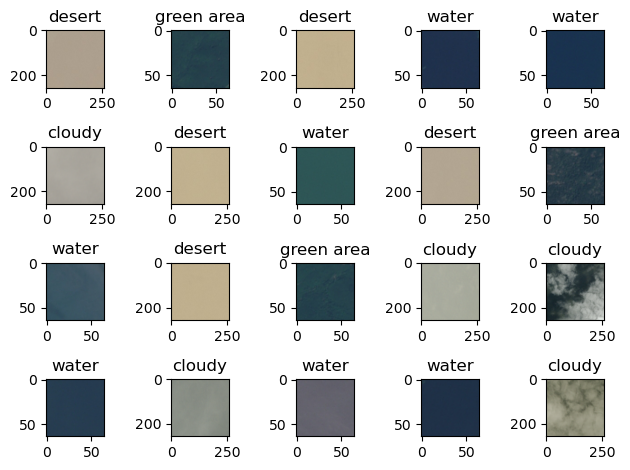

In [58]:
for i in range(20):
    plt.subplot(4,5, i+1)
    plt.imshow(image[i])

    if label[i] == 0:
        plt.title('cloudy')
    elif label[i] == 1: 
        plt.title('desert')
    elif label[i] == 2:
        plt.title('green area')
    else:
        plt.title('water')
    plt.tight_layout()

#### Check the shape of the first 10 images in our list 

In [59]:
for i in range(10): 
    print(image[i].shape)

(256, 256, 3)
(64, 64, 3)
(256, 256, 3)
(64, 64, 3)
(64, 64, 3)
(256, 256, 4)
(256, 256, 3)
(64, 64, 3)
(256, 256, 3)
(64, 64, 3)


#### Reshape the images

Also reassign them to new variables named X and convert them to a numpy array

In [60]:
from skimage.transform import resize

In [61]:
x = []
for i in image: 
    x.append(resize(i,(256,256,3)))
x = np.array(x)

#### create numpy arrays named y

In [63]:
y = np.array(label)

In [66]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x, y, random_state=42, test_size=0.1)

#### Check the shape of X_train and X_test and y_train and y_test

In [71]:
print(f'Shape of xtrain is:',xtrain.shape)
print(f'Shape of xtest is:',xtest.shape)
print(f'Shape of ytrain is:',ytrain.shape)
print(f'Shape of ytest is:',ytest.shape)

Shape of xtrain is: (2629, 256, 256, 3)
Shape of xtest is: (293, 256, 256, 3)
Shape of ytrain is: (2629,)
Shape of ytest is: (293,)


#### Create a keras Sequential model with convolution layers, Flatten and Hidden layers

In [73]:
from tensorflow import keras

In [74]:
model = keras.models.Sequential([
    keras.layers.Conv2D(16,(3, 3), activation = 'relu', input_shape = (256,256,3)),
    keras.layers.MaxPool2D(2,2),

    keras.layers.Conv2D(32,(3, 3), activation = 'relu'),
    keras.layers.MaxPool2D(2,2),

    keras.layers.Flatten(),
    keras.layers.Dense(64, activation = 'relu'),
    keras.layers.Dense(4, activation = 'softmax')
])

C:\Users\DHILSHANA SHIRIN\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


#### Compile the model

In [76]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics = ['accuracy'])

#### Check the summary of our model

In [78]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 254, 254, 16)        │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 127, 127, 16)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 125, 125, 32)        │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 62, 62, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 123008)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │       7,872,576 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 4)                   │             260 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,877,924 (30.05 MB)

 Trainable params: 7,877,924 (30.05 MB)

 Non-trainable params: 0 (0.00 B)

#### Train the model.

In [80]:
model.fit(xtrain, ytrain, epochs = 15, validation_split = 0.1)

Epoch 1/15
74/74 ━━━━━━━━━━━━━━━━━━━━ 1001s 14s/step - accuracy: 0.5454 - loss: 2.2055 - val_accuracy: 0.8441 - val_loss: 0.3227
Epoch 2/15
74/74 ━━━━━━━━━━━━━━━━━━━━ 40s 541ms/step - accuracy: 0.8728 - loss: 0.2976 - val_accuracy: 0.8897 - val_loss: 0.2302
Epoch 3/15
74/74 ━━━━━━━━━━━━━━━━━━━━ 40s 536ms/step - accuracy: 0.8761 - loss: 0.2643 - val_accuracy: 0.9011 - val_loss: 0.2434
Epoch 4/15
74/74 ━━━━━━━━━━━━━━━━━━━━ 38s 511ms/step - accuracy: 0.8819 - loss: 0.2408 - val_accuracy: 0.9354 - val_loss: 0.1800
Epoch 5/15
74/74 ━━━━━━━━━━━━━━━━━━━━ 38s 512ms/step - accuracy: 0.8773 - loss: 0.2611 - val_accuracy: 0.8821 - val_loss: 0.2300
Epoch 6/15
74/74 ━━━━━━━━━━━━━━━━━━━━ 38s 517ms/step - accuracy: 0.9206 - loss: 0.1737 - val_accuracy: 0.8517 - val_loss: 0.2747
Epoch 7/15
74/74 ━━━━━━━━━━━━━━━━━━━━ 39s 528ms/step - accuracy: 0.9086 - loss: 0.1912 - val_accuracy: 0.8213 - val_loss: 0.3593
Epoch 8/15
74/74 ━━━━━━━━━━━━━━━━━━━━ 42s 541ms/step - accuracy: 0.9175 - loss: 0.1897 - val_accu

#### Evaluate the model

In [97]:
model.evaluate(xtrain, ytrain)

83/83 ━━━━━━━━━━━━━━━━━━━━ 13s 152ms/step - accuracy: 0.9064 - loss: 0.2208


[0.2046075314283371, 0.9155572652816772]

#### Make predictions with X_test

In [112]:
ypred = model.predict(xtest)

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 70ms/step


In [121]:
y_pred = ypred.argmax(axis=1)

In [123]:
y_pred

array([0, 2, 1, 2, 3, 2, 3, 2, 2, 0, 1, 2, 0, 2, 2, 2, 0, 0, 3, 0, 2, 2,
       1, 0, 2, 1, 0, 2, 0, 0, 1, 0, 2, 1, 1, 1, 3, 0, 1, 0, 2, 2, 0, 1,
       0, 1, 1, 0, 2, 2, 0, 3, 3, 2, 2, 0, 3, 1, 3, 1, 1, 2, 2, 1, 2, 3,
       0, 2, 3, 2, 0, 3, 2, 0, 3, 2, 3, 1, 2, 3, 0, 1, 0, 3, 2, 0, 0, 0,
       2, 2, 3, 0, 2, 1, 0, 3, 2, 2, 0, 3, 2, 0, 0, 0, 1, 2, 2, 2, 0, 2,
       2, 0, 2, 1, 3, 3, 2, 2, 0, 2, 3, 3, 2, 1, 3, 0, 2, 0, 3, 3, 0, 3,
       2, 0, 0, 0, 3, 0, 1, 3, 1, 0, 3, 3, 2, 0, 0, 3, 2, 2, 0, 2, 2, 0,
       1, 2, 0, 2, 0, 0, 0, 2, 2, 3, 1, 3, 0, 1, 0, 2, 1, 1, 2, 2, 1, 3,
       0, 2, 3, 2, 2, 2, 0, 2, 3, 0, 1, 0, 2, 2, 3, 1, 0, 2, 1, 0, 3, 1,
       2, 2, 2, 0, 0, 0, 3, 0, 2, 1, 1, 2, 2, 1, 0, 3, 0, 1, 0, 0, 1, 2,
       3, 0, 0, 2, 1, 0, 0, 2, 2, 0, 0, 3, 2, 2, 1, 0, 1, 2, 0, 1, 2, 2,
       1, 2, 3, 2, 2, 0, 3, 0, 3, 1, 3, 0, 2, 3, 2, 2, 3, 0, 3, 3, 0, 2,
       3, 0, 1, 3, 3, 2, 0, 2, 2, 1, 2, 0, 1, 2, 2, 2, 0, 2, 0, 1, 2, 0,
       2, 2, 0, 0, 0, 2, 2], dtype=int64)

#### Plot X_test with label from our prediction

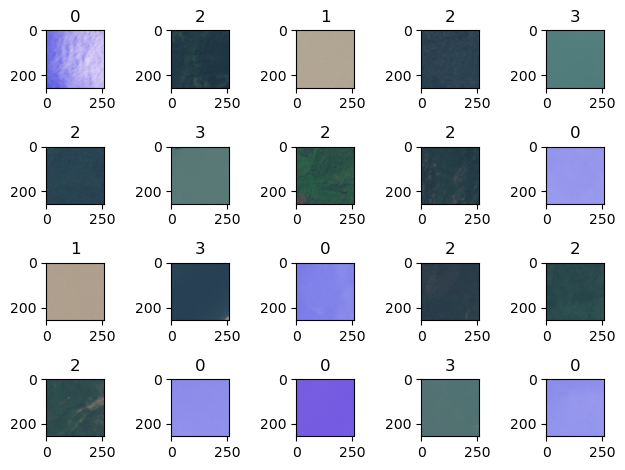

In [116]:
for i in range(20): 
    plt.subplot(4, 5, i+1)
    plt.imshow(xtest[i])
    plt.title(ytest[i])
    plt.tight_layout()

#### Visualise confusion matrix on a heatmap

In [125]:
from sklearn.metrics import ConfusionMatrixDisplay

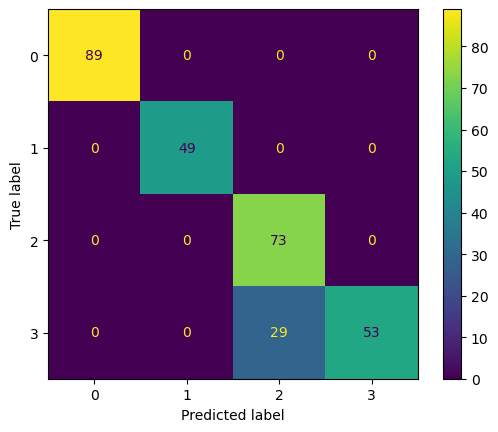

In [127]:
ConfusionMatrixDisplay.from_predictions(ytest, y_pred)